In [3]:
%run data_profiling.ipynb
%run data_transformation.ipynb
%run package_import.ipynb

In [4]:
import os
os.chdir(path='/Users/liuyifu/Project_data')

# Read data

Kaggle (https://www.kaggle.com/airbnb/seattle/data)

***Content***

The following Airbnb activity is included in this Seattle dataset:

***Listings***, including full descriptions and average review score

***Reviews***, including unique id for each reviewer and detailed comments

***Calendar***, including listing id and the price and availability for that day

## Read calendar.csv

In [5]:
df_calendar = pd.read_csv('Seattle_Airbnb/calendar.csv')

## Data profiling

### Data quality check

* Only the column "price" has null values, accounting for 33%. Rows with Null values in column "price" are to be deleted.

In [7]:
#convert the column price from string to float
df_calendar['price'] = transform_prices_column(df_calendar,'price')

/var/folders/ll/01gdbc2n2d1f47wbbx616f4r0000gn/T/ipykernel_2399/1151561823.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataframe[column] = dataframe[column].str.replace("$", "").str.replace(",", "")


In [8]:
#convert the column price from string to float
try:
    # remove "$" and "," before converting the column "price" from string into float
    df_calendar['date'] = pd.to_datetime(df_calendar['date'])
#     df_calendar['date'] =  df_calendar['date'].dt.date

except: pass

In [9]:
main_data_profiling(df_calendar)

,column_names,data_type,unique_count,min_value,max_value,mean_value,median_value,null_values,total_rows,%_null_values,num_lower_outliers,num_higher_outliers
0,listing_id,int64,3818,3335,10340165,5550111.418544,6118244.5,0,1393570,0.00000,0.0,0.0
1,date,datetime64[ns],365,2016-01-04 00:00:00,2017-01-02 00:00:00,2016-07-04 00:00:00.000000256,2016-07-04 00:00:00,0,1393570,0.00000,0.0,0.0
2,available,object,2,NaN,NaN,NaN,NaN,0,1393570,0.00000,NaN,NaN
3,price,float64,670,10.0,1650.0,137.944859,109.0,459028,1393570,0.32939,0.0,66000.0


* boxplot showing outliers

<AxesSubplot:>

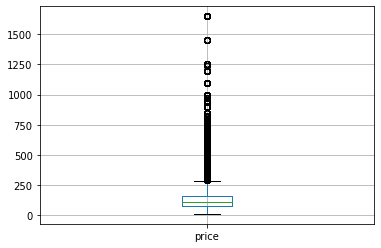

In [11]:
df_calendar.boxplot(column=['price'])

## Read listings.csv

In [13]:
df_listings = pd.read_csv(r'Seattle_Airbnb/listings.csv')

In [14]:
try:
    df_listings['experiences_offered'] = df_listings['experiences_offered'].replace("none", np.nan)
    
except:
    pass
    

In [15]:
df_listings['price'] = transform_prices_column(df_listings,'price')
df_listings['weekly_price'] = transform_prices_column(df_listings,'weekly_price')
df_listings['monthly_price'] = transform_prices_column(df_listings,'monthly_price')
df_listings['security_deposit'] = transform_prices_column(df_listings,'security_deposit')
df_listings['cleaning_fee'] = transform_prices_column(df_listings,'cleaning_fee')
df_listings['extra_people'] = transform_prices_column(df_listings,'extra_people')

/var/folders/ll/01gdbc2n2d1f47wbbx616f4r0000gn/T/ipykernel_2399/1151561823.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataframe[column] = dataframe[column].str.replace("$", "").str.replace(",", "")


### Data profiling

* ***Null values***: the column "license" and "experiences_offered" are 100% null values; the column "square_feet" has 97% null values. For the columns with over 97% null values, they need to be removed in ETL
* ***only one unique value***: ['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped',
 'requires_license',
 'license',
 'jurisdiction_names']. They might be not useful and need to be removed in ETL process

In [16]:
df_listings_profiling = main_data_profiling(df_listings)

/Users/liuyifu/.pyenv/versions/3.9.4/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/liuyifu/.pyenv/versions/3.9.4/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [17]:
#print data profiling for all columns
df_listings_profiling.sort_values(by=['column_names'])

,column_names,data_type,unique_count,min_value,max_value,mean_value,median_value,null_values,total_rows,%_null_values,num_lower_outliers,num_higher_outliers
50,accommodates,int64,15,1.000000e+00,1.600000e+01,3.349398e+00,3.000000e+00,0,3818,0.000000,0.0,184.0
55,amenities,object,3284,NaN,NaN,NaN,NaN,0,3818,0.000000,NaN,NaN
68,availability_30,int64,31,0.000000e+00,3.000000e+01,1.678628e+01,2.000000e+01,0,3818,0.000000,0.0,0.0
71,availability_365,int64,363,0.000000e+00,3.650000e+02,2.447727e+02,3.080000e+02,0,3818,0.000000,0.0,0.0
69,availability_60,int64,61,0.000000e+00,6.000000e+01,3.681482e+01,4.600000e+01,0,3818,0.000000,0.0,0.0
70,availability_90,int64,91,0.000000e+00,9.000000e+01,5.808250e+01,7.300000e+01,0,3818,0.000000,0.0,0.0
51,bathrooms,float64,13,0.000000e+00,8.000000e+00,1.259469e+00,1.000000e+00,16,3818,0.004191,39.0,881.0
54,bed_type,object,5,NaN,NaN,NaN,NaN,0,3818,0.000000,NaN,NaN
52,bedrooms,float64,9,0.000000e+00,7.000000e+00,1.307712e+00,1.000000e+00,6,3818,0.001572,0.0,100.0
53,beds,float64,12,1.000000e+00,1.500000e+01,1.735394e+00,1.000000e+00,1,3818,0.000262,0.0,271.0


#### null value check

In [ ]:
# list 100% null values
list(df_listings_profiling.loc[df_listings_profiling['%_null_values'] == 1, 'column_names'])

#### only one unique value check

In [ ]:
# list columns with only one unique value
list(df_listings_profiling[df_listings_profiling['unique_count'] == 1].columns)

#### use boxplot to check the columns with outliers

In [ ]:
outliers_col = list(df_listings_profiling.loc[(df_listings_profiling['num_lower_outliers'].notna()) & (df_listings_profiling['num_higher_outliers'].notna()) & ( (df_listings_profiling['num_lower_outliers']>0) | (df_listings_profiling['num_higher_outliers']>0) ), 'column_names'])
boxplot_outliers(df_listings, outliers_col)

In [ ]:
check_duplication(df_listings)

## Read reviews.csv

In [ ]:
df_reviews = pd.read_csv(r'Seattle_Airbnb/reviews.csv')

In [ ]:
populate_rows_columns(df_reviews)

In [ ]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

In [ ]:
main_data_profiling(df_reviews)

In [ ]:
check_duplication(df_reviews)